In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train_original=train.copy() #to keep original files
test_original=test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns #name of clm in data

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

The test has 12 clms while train has 13 clm with target variable.

In [6]:
train.info() #to check data type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.shape,test.shape #rows and col of train and test

((614, 13), (367, 12))

Target variable : Loan_Status

<b>univariate analysis

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

It has 422 yes and 192 No

In [9]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Here we got percentages of yes and no has yes is 69% and no is 31%

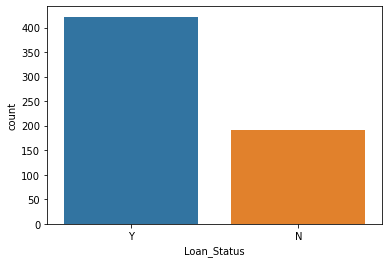

In [10]:
sns.countplot(train['Loan_Status'])

From 614 the loan apprived for 422 that is 69 %.

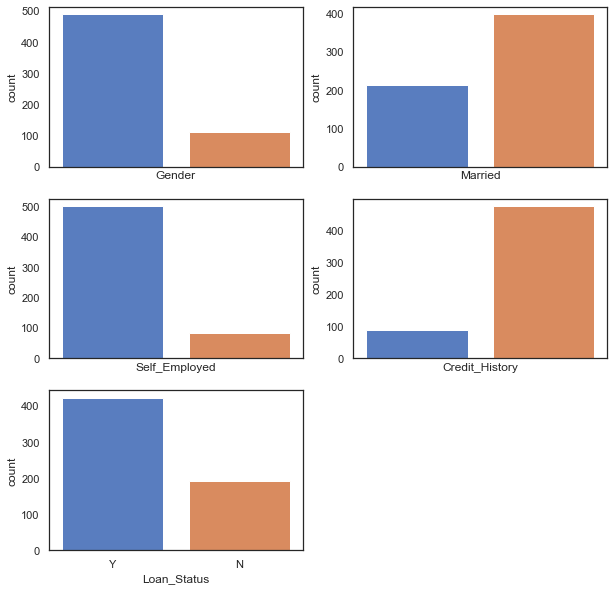

In [11]:
#for ordinal data visualization:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=True)
sns.countplot(train['Gender'],ax=axes[0,0])
sns.countplot(train['Married'],ax=axes[0,1])
sns.countplot(train['Self_Employed'],ax=axes[1,0])
sns.countplot(train['Credit_History'],ax=axes[1,1])
sns.countplot(train['Loan_Status'],ax=axes[2,0])
f.show()
f.delaxes(axes[2,1])

In [12]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


we can see gender has 80% male.
65% are married.
15% are selfemployed.

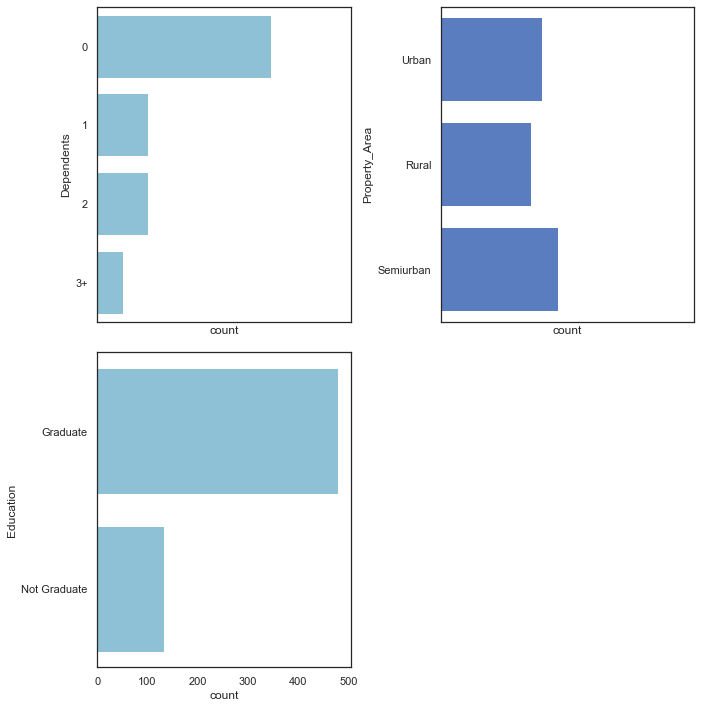

In [13]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.countplot(y="Dependents", data=train, color="c",ax=axes[0,0])
sns.countplot(y="Property_Area", data=train, color="b",ax=axes[0,1])
sns.countplot(y="Education", data=train, color="c",ax=axes[1,0])
f.tight_layout()
f.delaxes(axes[1,1])

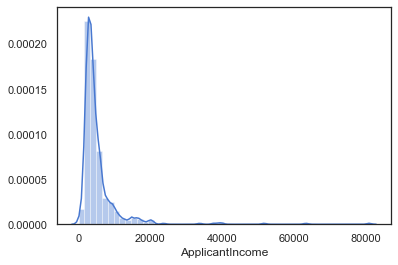

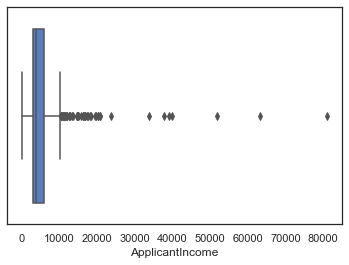

In [14]:
#numerical variable:
sns.distplot(train['ApplicantIncome'])
plt.show()
sns.boxplot(train['ApplicantIncome'])
plt.show()

Application has right skewed data and have lots of outliers.The data is not normal.

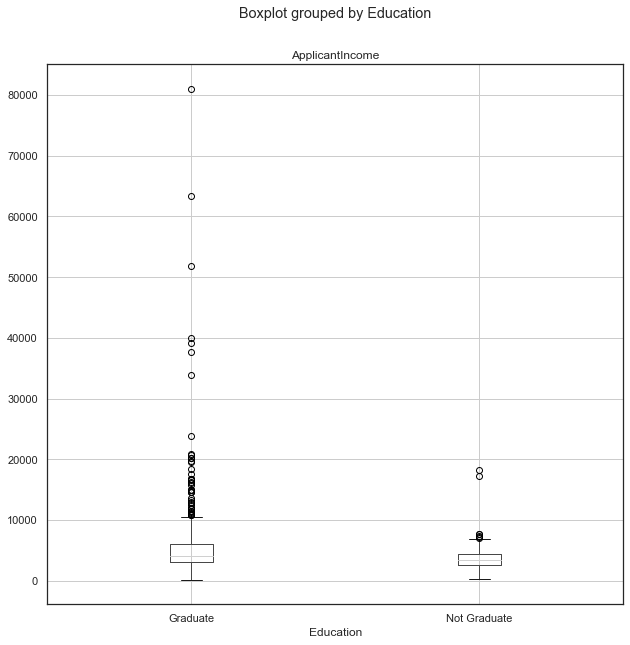

In [27]:
train.boxplot(column='ApplicantIncome',by='Education',figsize=(10,10))
f.show()

graduates has more outliers than not graduates that means graduates has more salary/income so appearing as outliers.

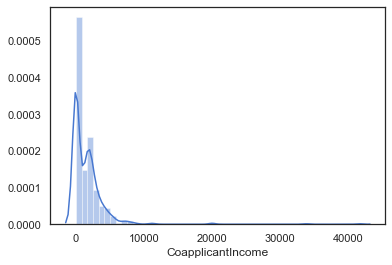

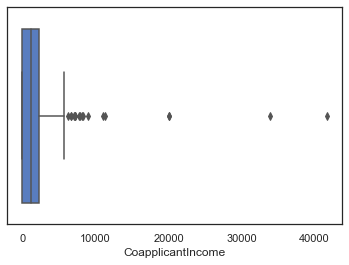

In [28]:
#numerical variable:
sns.distplot(train['CoapplicantIncome'])
plt.show()
sns.boxplot(train['CoapplicantIncome'])
plt.show()

data is not normal it is right skewed and has less outliers than above data.Not normally distributed

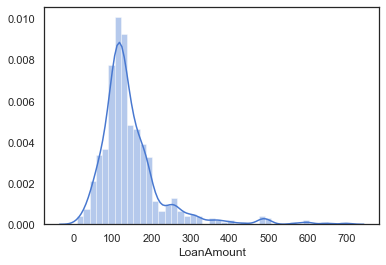

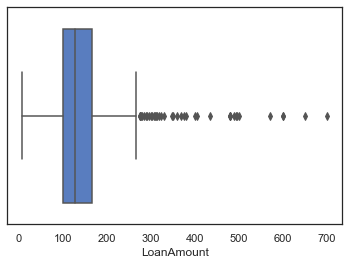

In [29]:
#numerical variable:
sns.distplot(train['LoanAmount'])
plt.show()
sns.boxplot(train['LoanAmount'])
plt.show()

data is not normal and has right skewed and has outliers.data is not normal.Most data is between 100 to 300

<b>Bivariate data analysis